## Step 1: Dataset Selection

# **Social Media Sentiments Analysis**

 **Goal of the Project:** In this project, we aim to develop a Social Media Sentiment Analysis system to assist organizations, including platforms like Facebook and Twitter. The objective is to understand and analyze user sentiments, enabling the organization to better serve users by providing the information or objects they are searching for.

## Import Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Step 2: Data Preparation

In [ ]:
data = pd.read_csv('sentimentdataset.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023.0,1.0,15.0,12.0
1,1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023.0,1.0,15.0,8.0
2,2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023.0,1.0,15.0,15.0
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023.0,1.0,15.0,18.0
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,NaN,1.0,15.0,19.0


# Step 3: Data Cleaning

In [140]:
# drop column Unnamed: 0.1
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [141]:
data.shape

(732, 13)

In [142]:
data.dtypes

Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets       int64
Likes          int64
Country       object
Year         float64
Month        float64
Day          float64
Hour         float64
dtype: object

In [143]:
data.duplicated().sum()

7

In [144]:
data.drop_duplicates(inplace=True)

In [145]:
data.isnull().sum()

Text           0
Sentiment      0
Timestamp      0
User           0
Platform       0
Hashtags       0
Retweets       0
Likes          0
Country        0
Year         267
Month        314
Day          362
Hour         214
dtype: int64

In [146]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year
data['Hour'] = data['Timestamp'].dt.hour

In [147]:
data['Text']= data['Text'].str.strip()
data['Sentiment']= data['Sentiment'].str.strip()
data['User']= data['User'].str.strip()
data['Platform']= data['Platform'].str.strip()
data['Hashtags']= data['Hashtags'].str.strip()
data['Country']= data['Country'].str.strip()

In [148]:
data.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [149]:
data['Platform'].value_counts()

Platform
Instagram    256
Twitter      240
Facebook     229
Name: count, dtype: int64

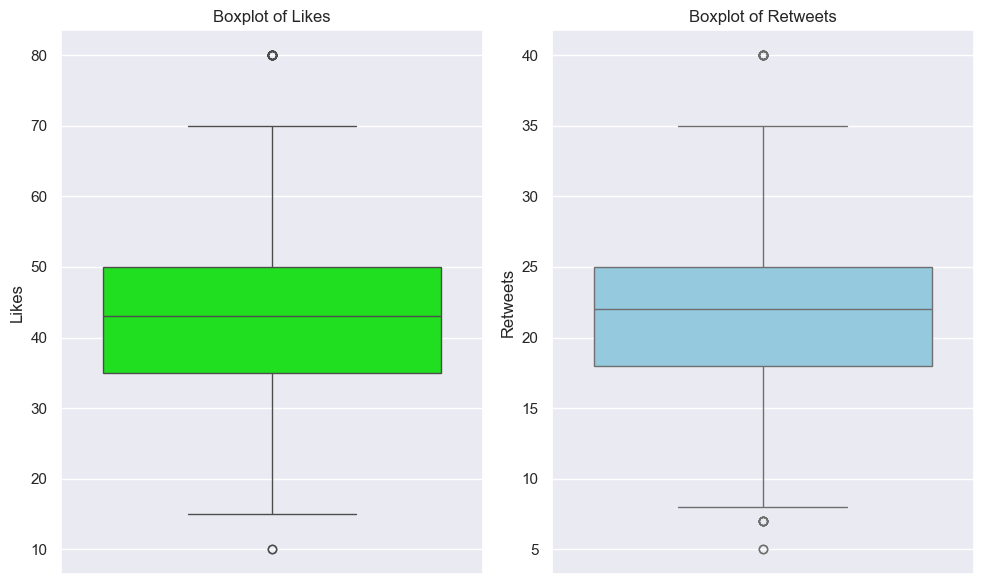

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data=data, y='Likes', ax=axes[0], color='lime')
axes[0].set_title('Boxplot of Likes')
axes[0].set_ylabel('Likes')
axes[0].set_xlabel('')

sns.boxplot(data=data, y='Retweets', ax=axes[1], color='skyblue')
axes[1].set_title('Boxplot of Retweets')
axes[1].set_ylabel('Retweets')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()


In [151]:
data_copy = data[['Likes', 'Retweets']]

def remove_outliers_iqr_multi(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

columns_to_remove_outliers = ['Likes', 'Retweets']  

data_no_outliers = remove_outliers_iqr_multi(data_copy, columns_to_remove_outliers)


In [152]:
data_no_outliers.describe()

,Likes,Retweets
count,707.000000,707.000000
mean,42.198020,21.158416
std,13.045588,6.544277
min,15.000000,7.000000
25%,34.000000,17.000000
50%,42.000000,21.000000
75%,50.000000,25.000000
max,70.000000,35.000000


In [153]:
numerical_columns = data[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {data[col].min()} | Maximum {col}: {data[col].max()}")


Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10 | Maximum Likes: 80
Minimum Retweets: 5 | Maximum Retweets: 40


# Step 4: Data Visualization

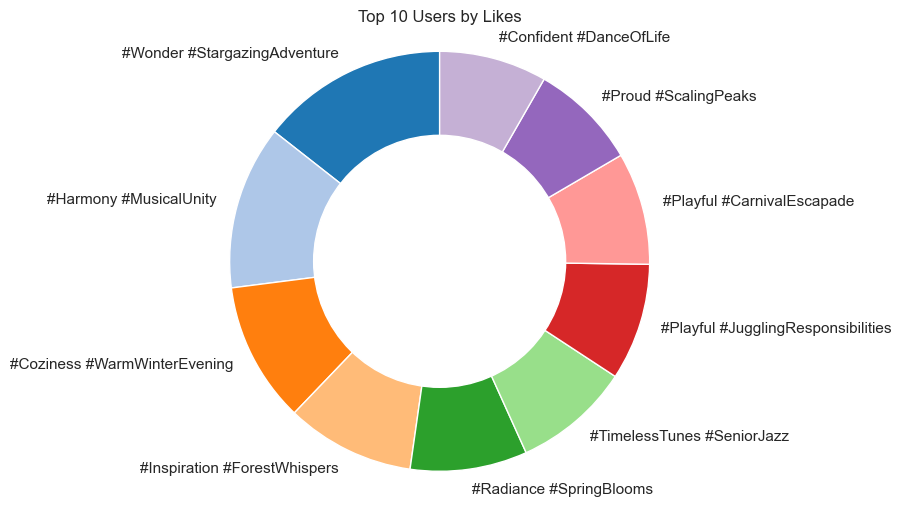

In [178]:
import pandas as pd
import matplotlib.pyplot as plt



# Group data by user and sum up the likes
user_likes = data.groupby('Hashtags')['Likes'].sum()

# Sort users based on their total likes
user_likes_sorted = user_likes.sort_values(ascending=False)

# Select top 10 users
top_10_users = user_likes_sorted.head(10)

# Create outer ring (pie chart)
fig, ax = plt.subplots(figsize=(8, 6))
outer_circle, _ = ax.pie(top_10_users, labels=top_10_users.index, startangle=90, colors=plt.cm.tab20.colors)

# Create inner circle (white circle to make a donut plot)
inner_circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(inner_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title('Top 10 Users by Likes')
plt.show()


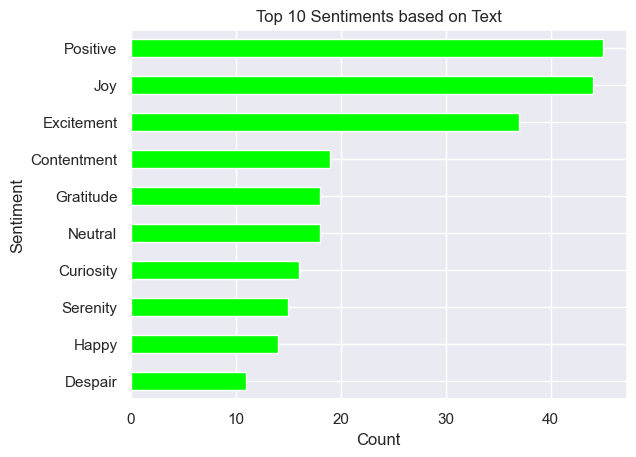

In [157]:
data['Sentiment'].value_counts().nlargest(10).sort_values().plot(kind='barh', color='lime')
plt.title('Top 10 Sentiments based on Text')
plt.ylabel('Sentiment')
plt.xlabel('Count')
plt.show()

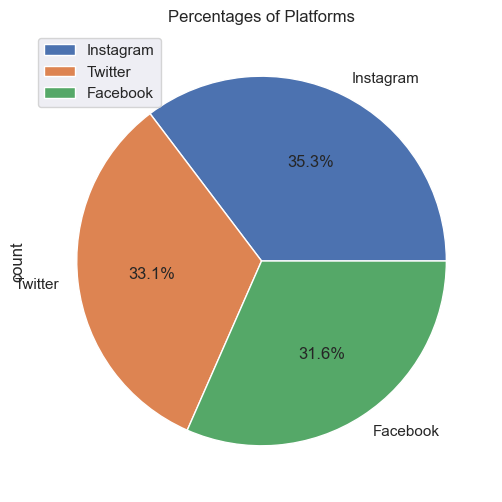

In [158]:
plt.figure(figsize=(8,6))
data['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend(loc='upper left')
plt.show()


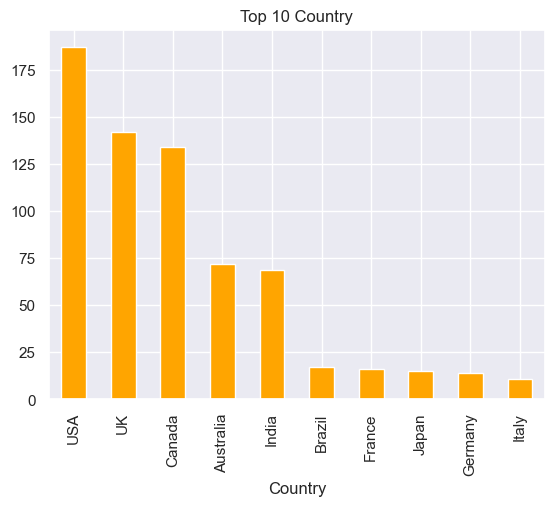

In [159]:
data['Country'].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Country')
plt.show()

# Relationships between columns

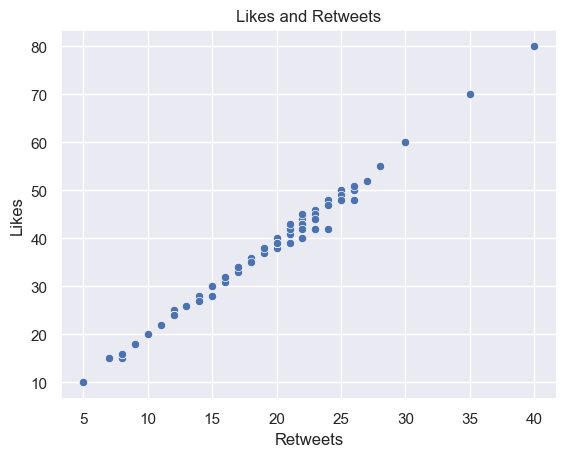

In [160]:
sns.scatterplot(data=data, x='Retweets', y='Likes')
plt.title('Likes and Retweets')
plt.show()

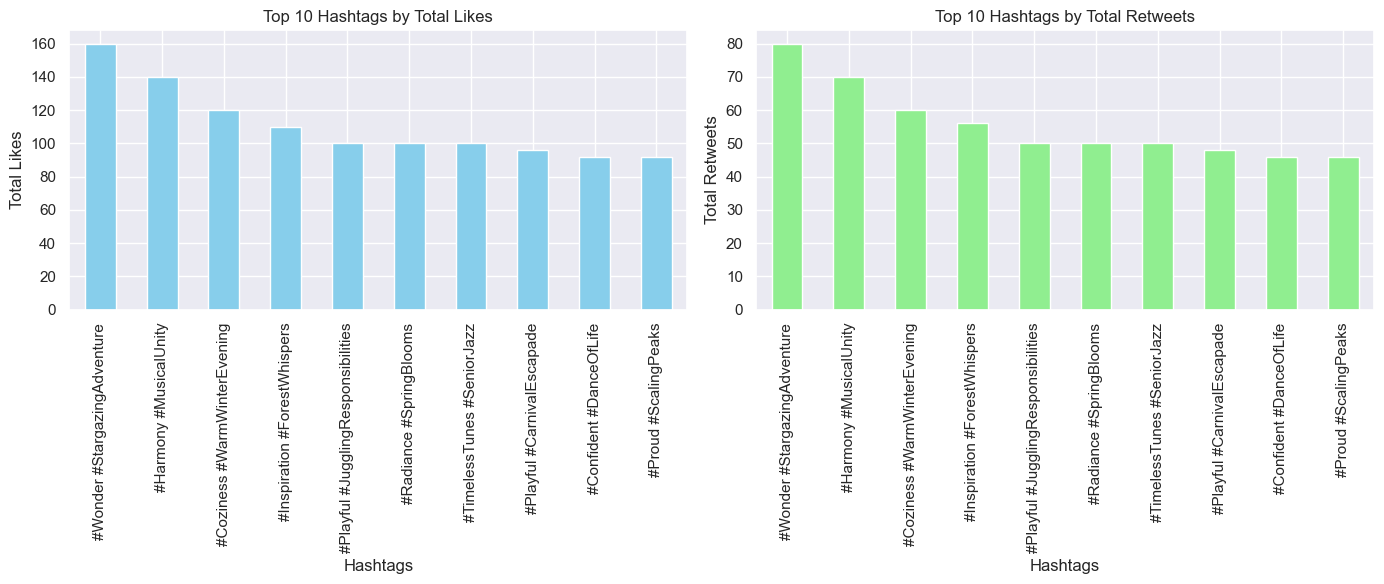

In [161]:
top_hashtags = data.groupby('Hashtags').agg({'Likes': 'sum', 'Retweets': 'sum'}).nlargest(10, 'Likes')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_hashtags['Likes'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Hashtags by Total Likes')
axes[0].set_xlabel('Hashtags')
axes[0].set_ylabel('Total Likes')

top_hashtags['Retweets'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Hashtags by Total Retweets')
axes[1].set_xlabel('Hashtags')
axes[1].set_ylabel('Total Retweets')

plt.tight_layout()
plt.show()

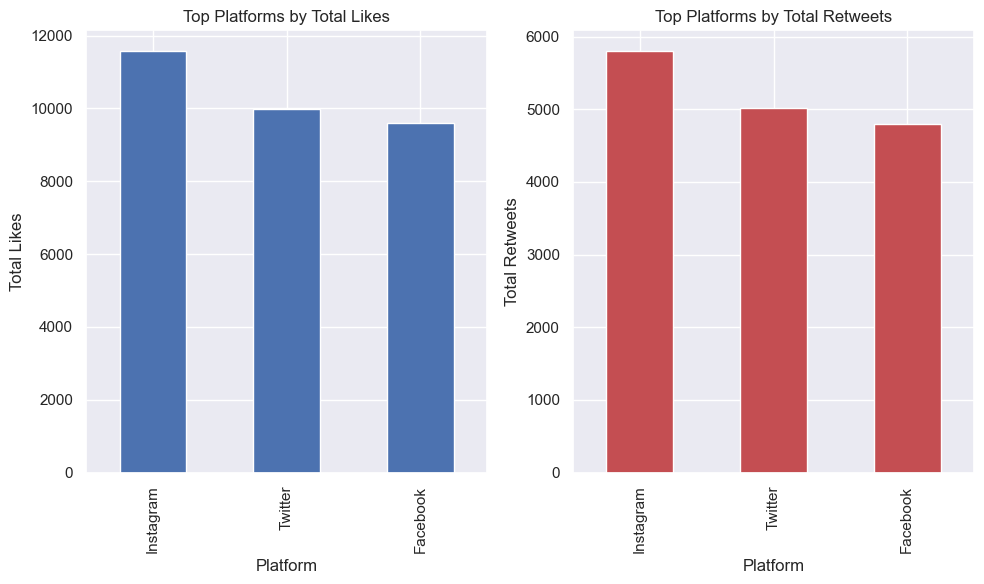

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6)) 

top_likes_platform = data.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar', ax=axes[0], color='b')  
axes[0].set_title('Top Platforms by Total Likes')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total Likes')

top_retweets_platform = data.groupby('Platform')['Retweets'].sum().nlargest(10)
top_retweets_platform.plot(kind='bar', ax=axes[1], color='r')  
axes[1].set_title('Top Platforms by Total Retweets')
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Total Retweets')

plt.tight_layout()
plt.show()


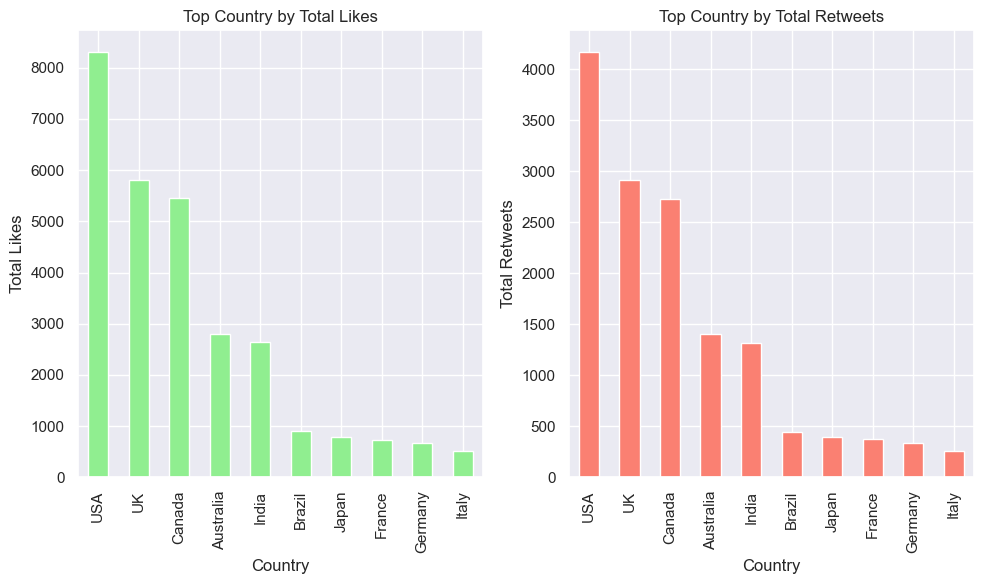

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))

top_likes_platform = data.groupby('Country')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar', ax=axes[0], color='lightgreen')  
axes[0].set_title('Top Country by Total Likes')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Likes')

top_retweets_platform = data.groupby('Country')['Retweets'].sum().nlargest(10)
top_retweets_platform.plot(kind='bar', ax=axes[1], color='salmon')  
axes[1].set_title('Top Country by Total Retweets')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Total Retweets')

plt.tight_layout()
plt.show()

# Separate users for each platform

In [164]:
Facebook=data[data['Platform']=='Facebook']
Twitter=data[data['Platform']=='Twitter']
Instagram=data[data['Platform']=='Instagram']

# **Facebook**


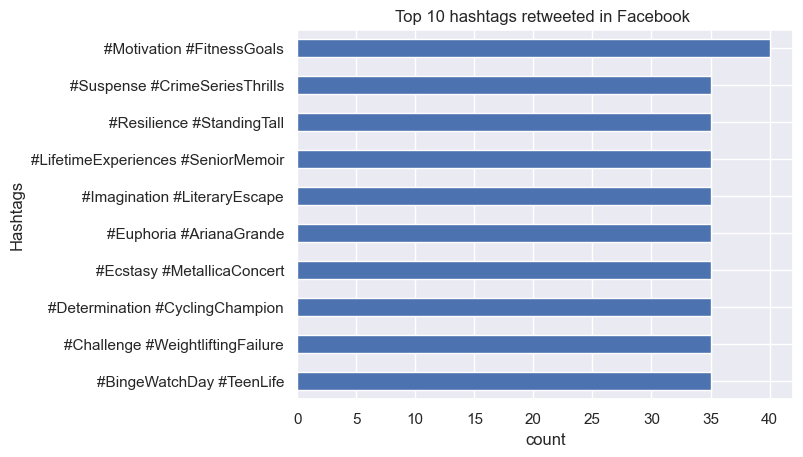

In [165]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values()
H_R_f.plot(kind='barh')
plt.title('Top 10 hashtags retweeted in Facebook ')
plt.ylabel('Hashtags')
plt.xlabel('count')
plt.show()

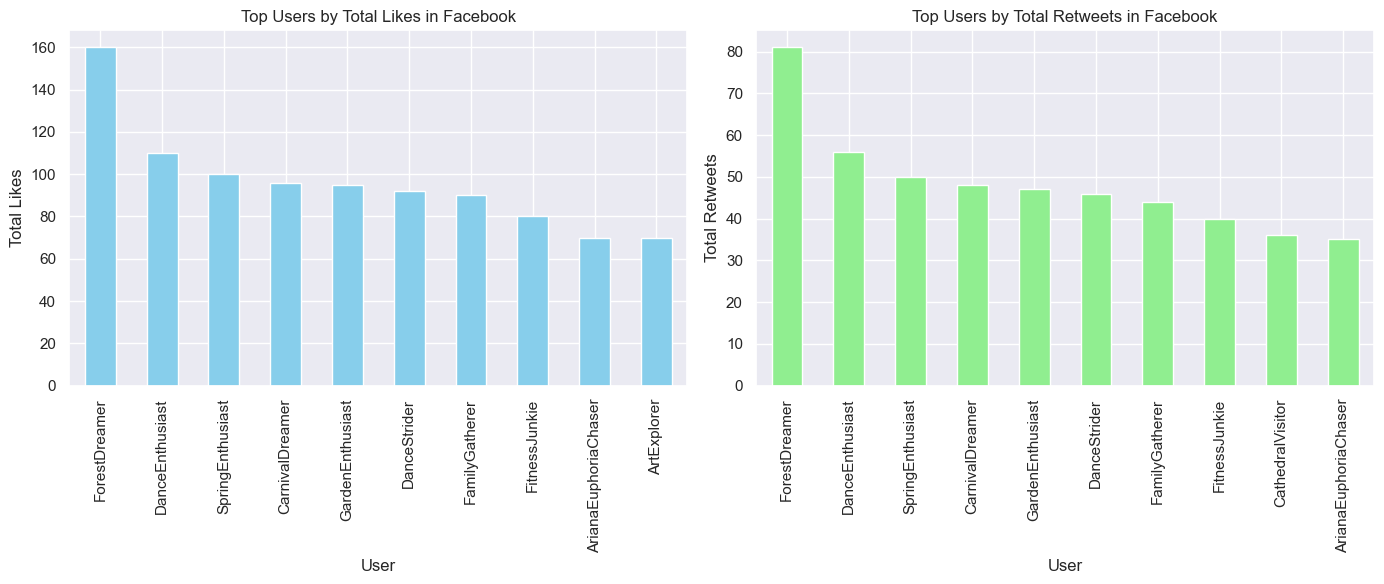

In [166]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_retweets_platform_F = Facebook.groupby('User')['Retweets'].sum().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_likes_platform_F.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top Users by Total Likes in Facebook')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Total Likes')

top_retweets_platform_F.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Top Users by Total Retweets in Facebook')
axes[1].set_xlabel('User')
axes[1].set_ylabel('Total Retweets')

plt.tight_layout()
plt.show()


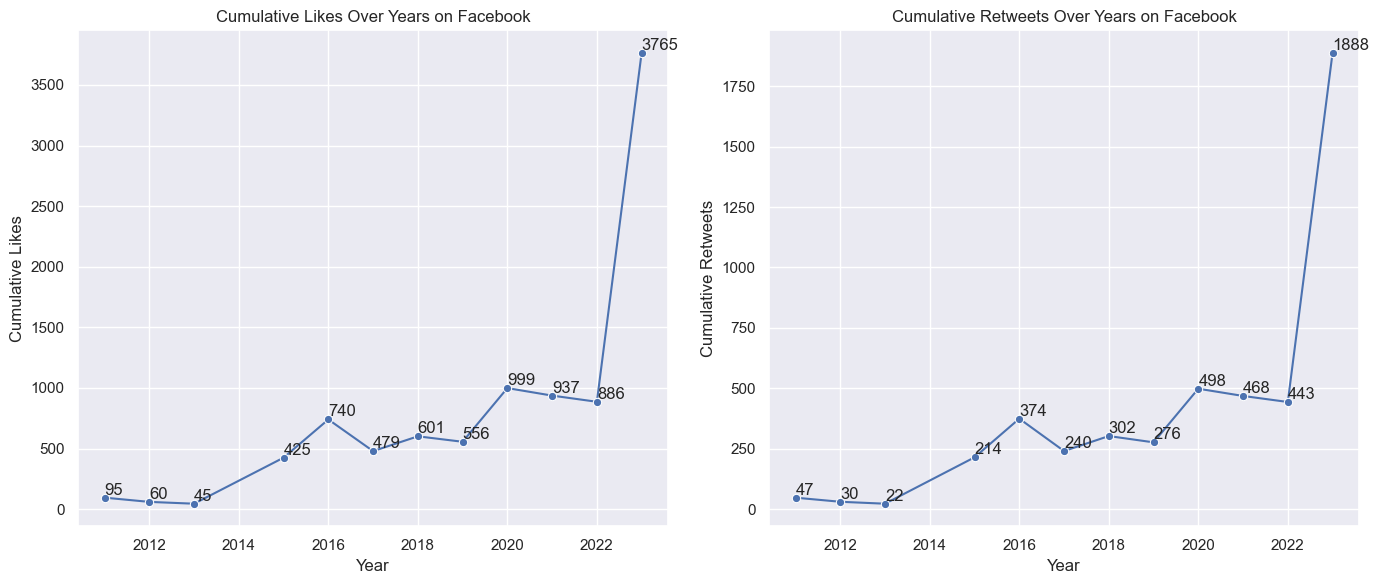

In [167]:
likes_by_year = Facebook.groupby('Year')['Likes'].sum().reset_index()
retweets_by_year = Facebook.groupby('Year')['Retweets'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=likes_by_year, x='Year', y='Likes', marker='o', ax=axes[0])
for index, value in likes_by_year.iterrows():
    axes[0].text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

axes[0].set_title('Cumulative Likes Over Years on Facebook')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Cumulative Likes')

sns.lineplot(data=retweets_by_year, x='Year', y='Retweets', marker='o', ax=axes[1])
for index, value in retweets_by_year.iterrows():
    axes[1].text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

axes[1].set_title('Cumulative Retweets Over Years on Facebook')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Cumulative Retweets')

plt.tight_layout()
plt.show()

# **Twitter**

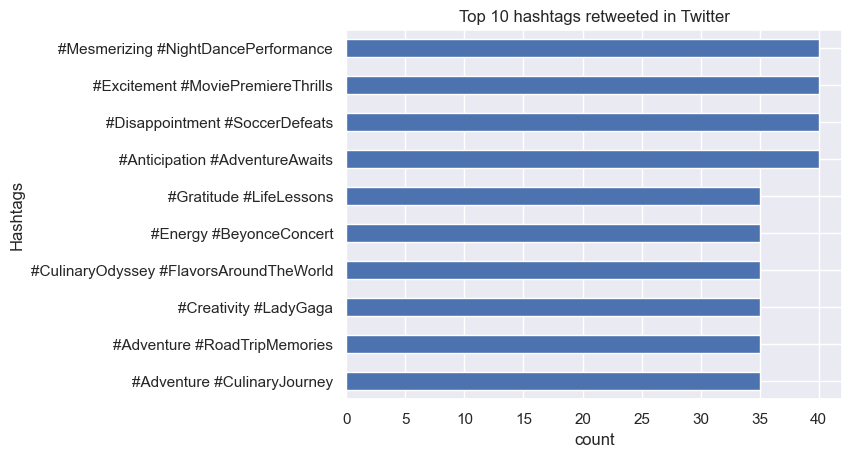

In [168]:
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values()
H_R_t.plot(kind='barh')
plt.title('Top 10 hashtags retweeted in Twitter')
plt.ylabel('Hashtags')
plt.xlabel('count')
plt.show()

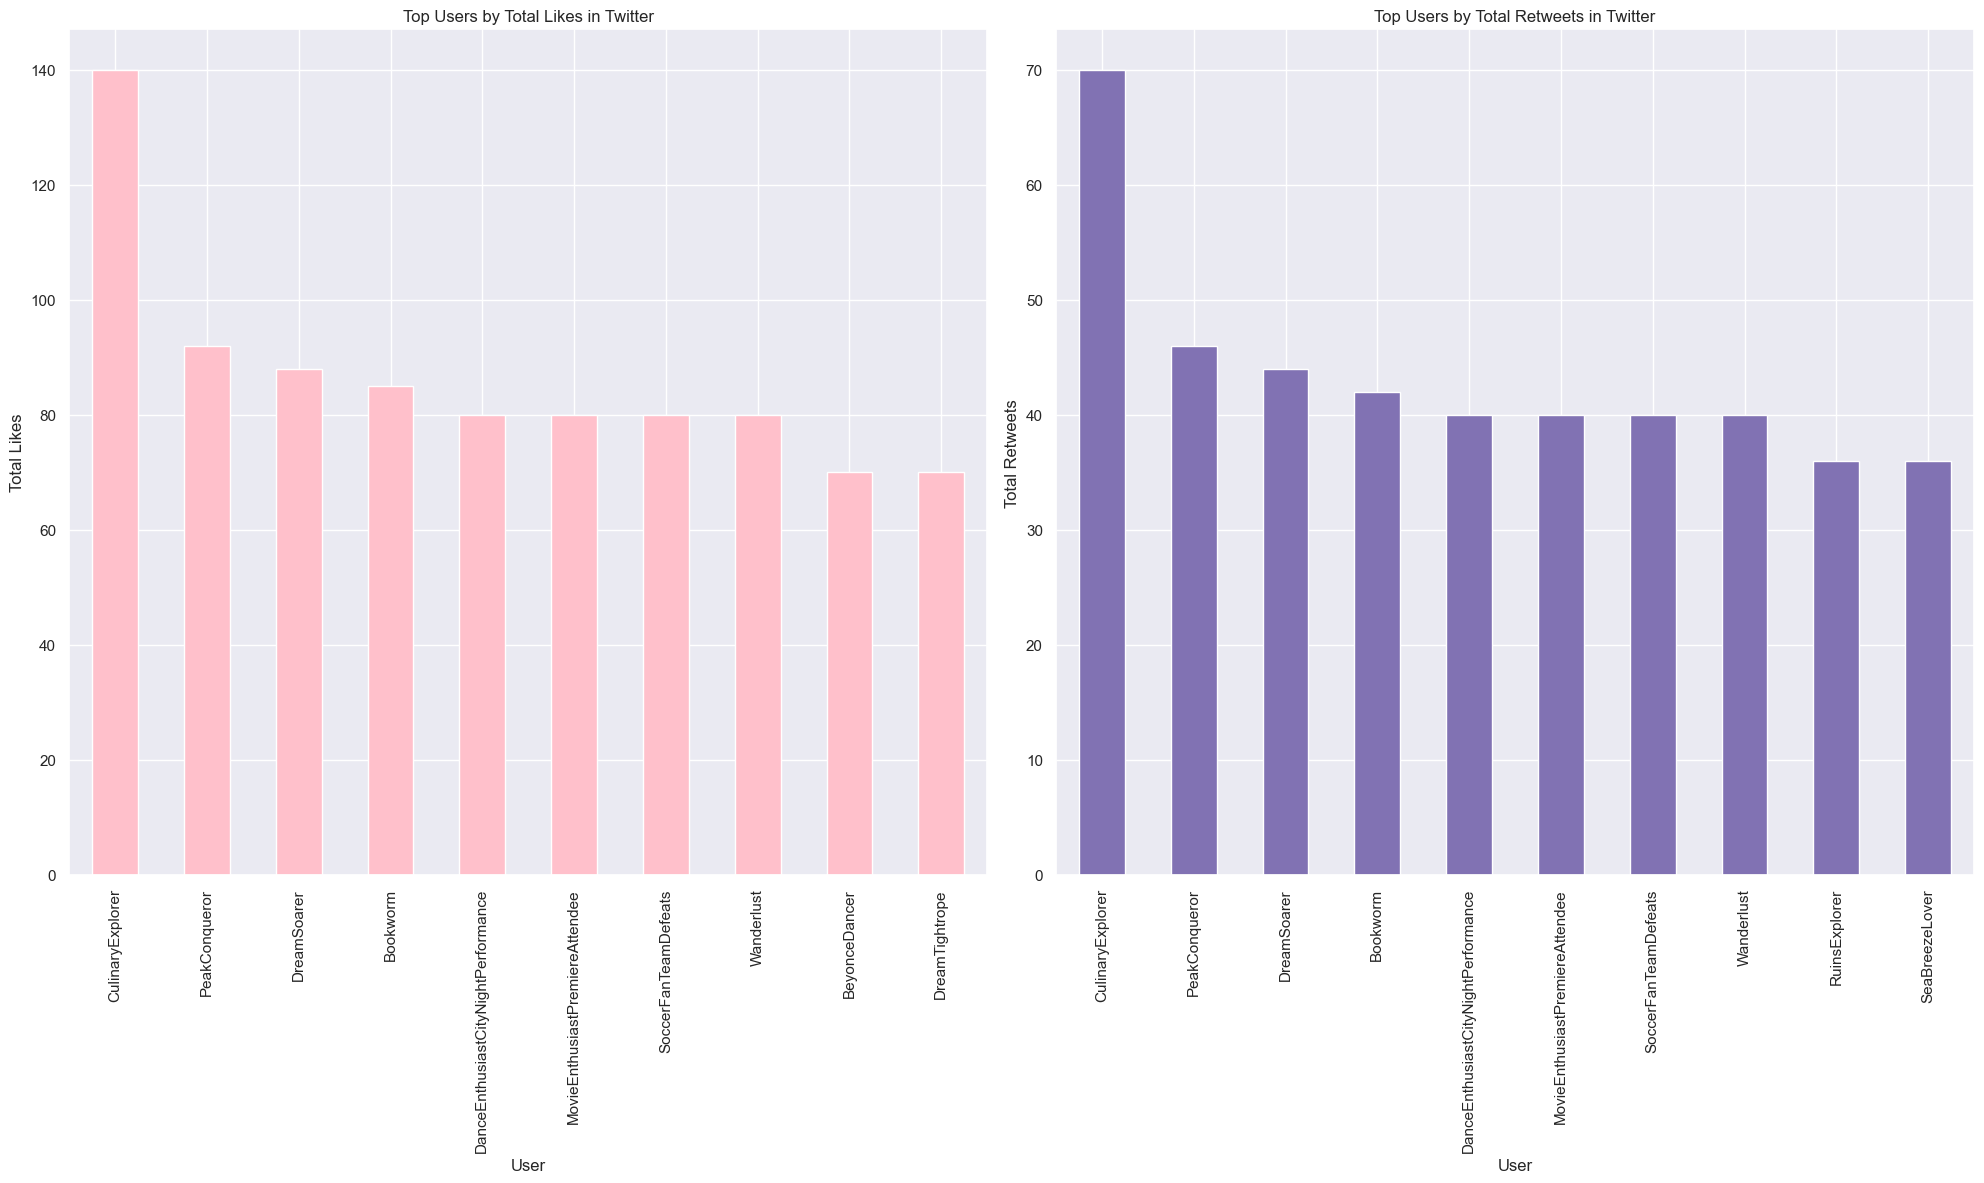

In [169]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_retweets_platform_t = Twitter.groupby('User')['Retweets'].sum().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))

top_likes_platform_t.plot(kind='bar', ax=axes[0], color='pink')
axes[0].set_title('Top Users by Total Likes in Twitter')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Total Likes')

top_retweets_platform_t.plot(kind='bar', ax=axes[1], color='m')
axes[1].set_title('Top Users by Total Retweets in Twitter')
axes[1].set_xlabel('User')
axes[1].set_ylabel('Total Retweets')

plt.tight_layout()
plt.show()


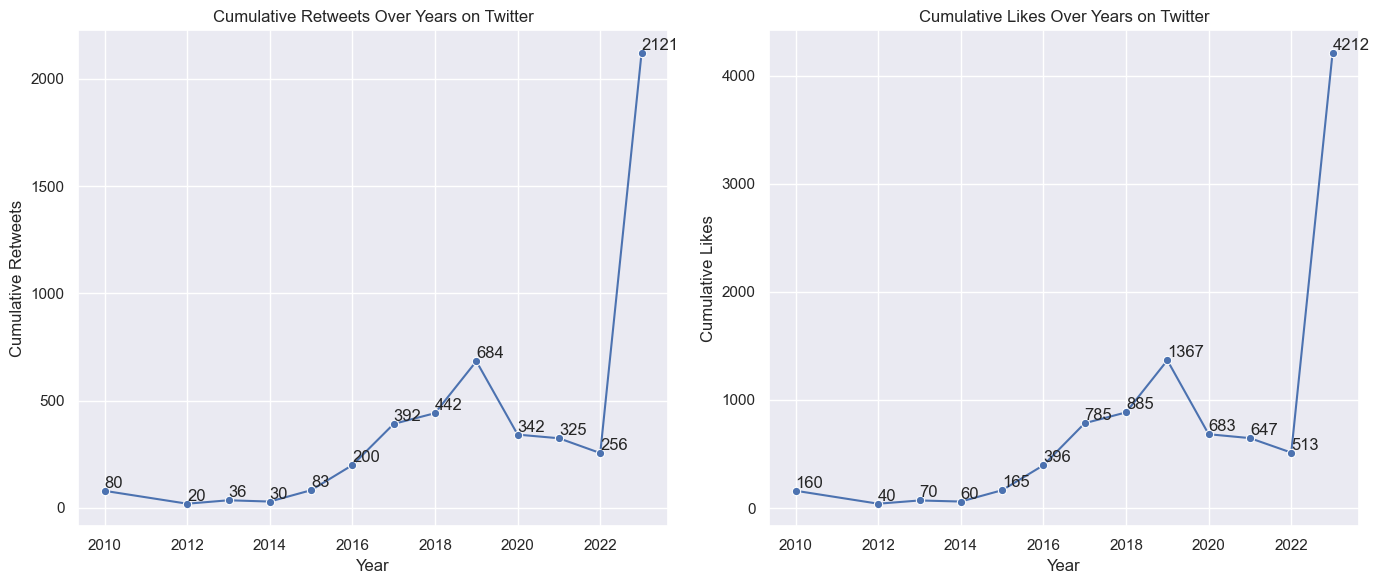

In [170]:
retweets_by_year = Twitter.groupby('Year')['Retweets'].sum().reset_index()
likes_by_year = Twitter.groupby('Year')['Likes'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=retweets_by_year, x='Year', y='Retweets', marker='o', ax=axes[0])
for index, value in retweets_by_year.iterrows():
    axes[0].text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

axes[0].set_title('Cumulative Retweets Over Years on Twitter')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Cumulative Retweets')

sns.lineplot(data=likes_by_year, x='Year', y='Likes', marker='o', ax=axes[1])
for index, value in likes_by_year.iterrows():
    axes[1].text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

axes[1].set_title('Cumulative Likes Over Years on Twitter')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Cumulative Likes')

plt.tight_layout()
plt.show()


# **Instagram**

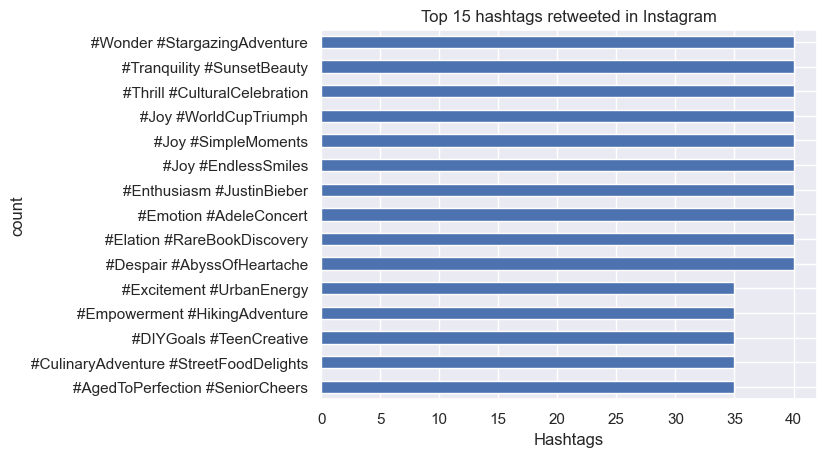

In [171]:
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values()
H_R_i.plot(kind='barh')
plt.title('Top 15 hashtags retweeted in Instagram')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

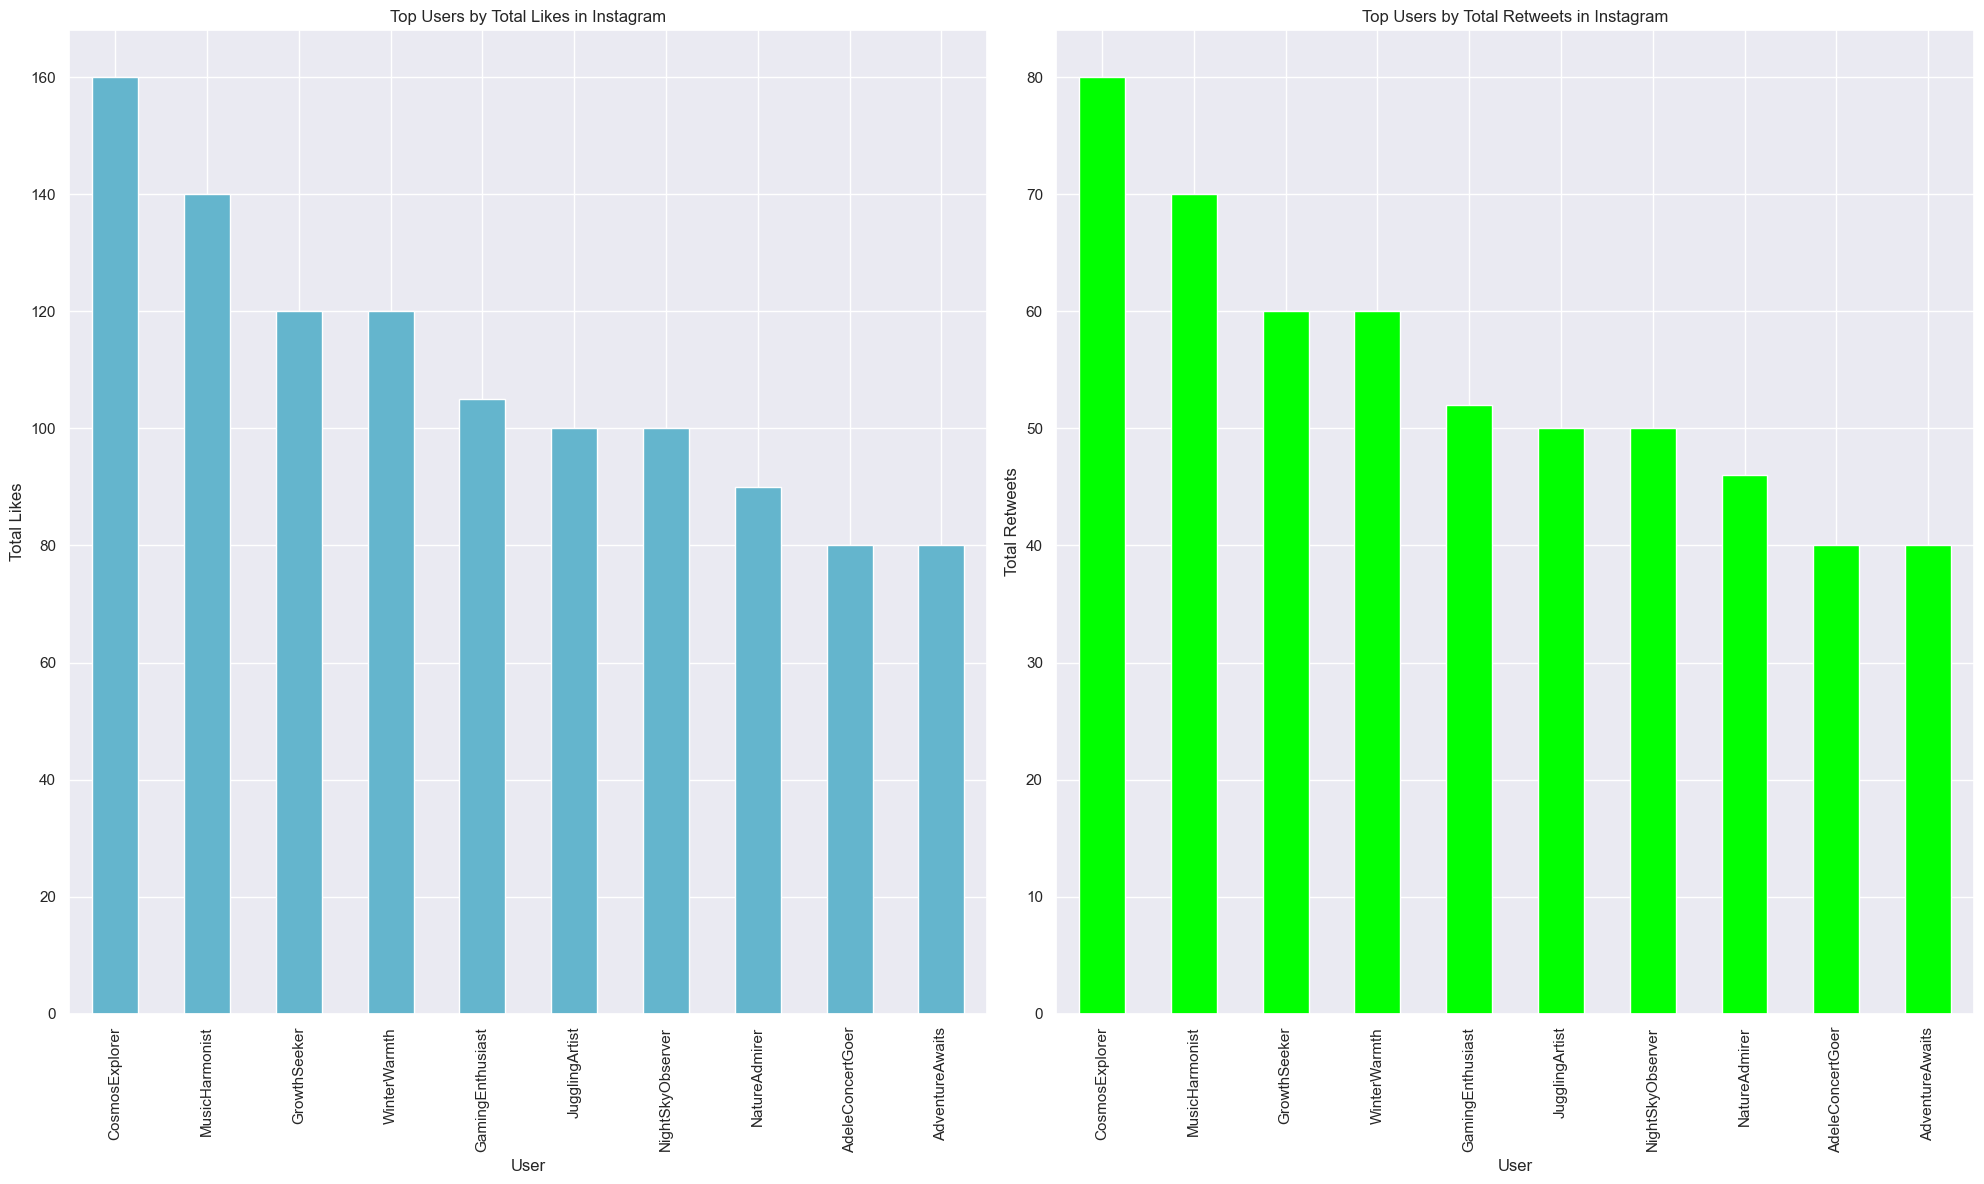

In [172]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_retweets_platform_i = Instagram.groupby('User')['Retweets'].sum().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))

top_likes_platform_i.plot(kind='bar', ax=axes[0], color='c')
axes[0].set_title('Top Users by Total Likes in Instagram')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Total Likes')

top_retweets_platform_i.plot(kind='bar', ax=axes[1], color='lime')
axes[1].set_title('Top Users by Total Retweets in Instagram')
axes[1].set_xlabel('User')
axes[1].set_ylabel('Total Retweets')

plt.tight_layout()
plt.show()


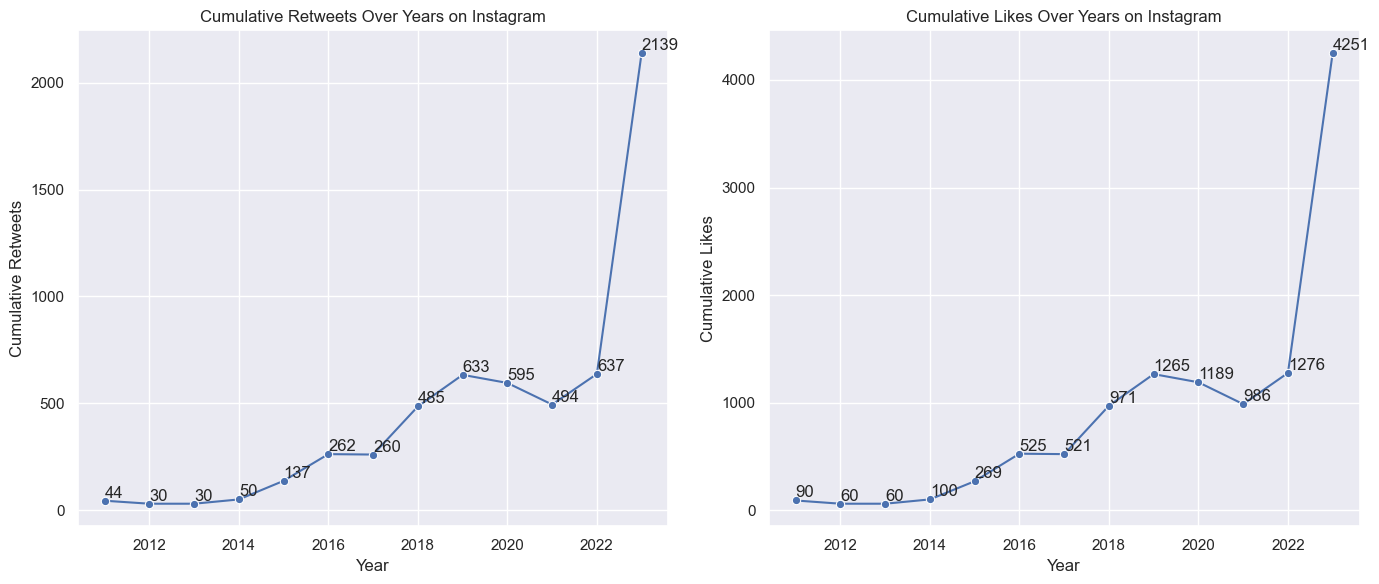

In [173]:
retweets_by_year = Instagram.groupby('Year')['Retweets'].sum().reset_index()
likes_by_year = Instagram.groupby('Year')['Likes'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=retweets_by_year, x='Year', y='Retweets', marker='o', ax=axes[0])
for index, value in retweets_by_year.iterrows():
    axes[0].text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

axes[0].set_title('Cumulative Retweets Over Years on Instagram')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Cumulative Retweets')

sns.lineplot(data=likes_by_year, x='Year', y='Likes', marker='o', ax=axes[1])
for index, value in likes_by_year.iterrows():
    axes[1].text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

axes[1].set_title('Cumulative Likes Over Years on Instagram')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Cumulative Likes')

plt.tight_layout()
plt.show()
